# Machine Learning

Generelt vil jeg forsøge at have en konsistent framgangs måde til de forskellige emner. Først vil der være en beskrivelse af algoritmen i form af matematik. Herefter vil der komme en manuel implementering af algoritmen i python og til sidst vil den bliver sammenlignet med `sklearn` version.

/var/folders/0k/d7s5j38d55d1v8wt0_thbmr80000gn/T/ipykernel_17818/2966878552.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


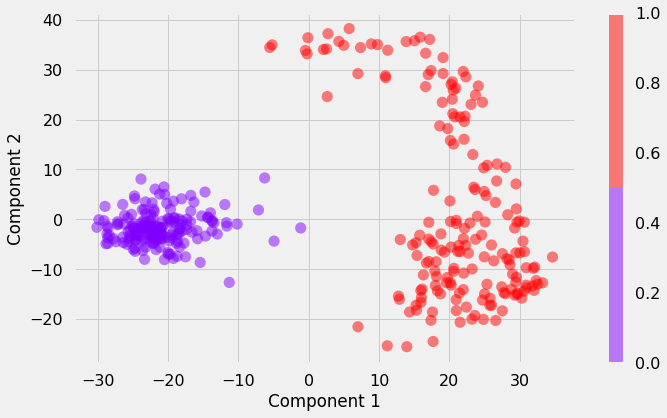

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA 

plt.style.use('seaborn-poster')
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 6))

# Handy plotting functions
#x_min, x_max = -40, 40
#y_min, y_max = -40, 40
# We're using a subset of two classes for now
digits = load_digits(n_class=2)
def plot_examples():
    show_num = 4
    _, axes = plt.subplots(1, show_num)
    images_and_labels = list(zip(digits.images, digits.target))
    for ax, (image, label) in zip(axes[:], images_and_labels[:show_num]):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title('Label: %i' % label)

def plot_scatter(data, target, n_class=2):
    plt.scatter(data[:, 0], data[:, 1], c=target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('rainbow', n_class))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar();
 #   plt.xlim(x_min, x_max)
  #  plt.ylim(y_min, y_max)


# Data
# We're using a subset of two classes for now
digits = load_digits(n_class=2)

# We can get a 2D version of the data using PCA
pca = PCA(n_components=2)
X = pca.fit_transform(digits.data) # this is the representation, we'll be working with

# Out targets are in the set {0,1}
t_01 = digits.target

# Let's plot all the data in 2D
plot_scatter(X, t_01)

# Supervised learning

## Klassifikation

Et klassifikations problem omhandler at vi tager et input, x og tilskriver det en klasse $C_k$. I det mest lette tilfælde ser vi på at klasserne er disjoint så hver input kan kobles på en klasse. Derfor vil **input rummet** deles op i *decision regions* hvor grænsefladerne kaldes *decision boundaries*. Vi vil gennemgå lineær modeller, hvor decision boundarie er en lineær funktion af input, x og heraf er definerede af $(D-1)$ dimensionel hyperplan. Data klasser der kan seperes af en lineær decision boundary kaldes lineær seperable. 

Lad os til en start definere et klassifikations problem. Vi har K klasser med en binær skema for vores target vektor *t*.  

### Least squares for classification

Lad os starte øvelsen med at benytte **sum-of-squars**, som egentlig er den kendte metodik for lineær regression, til at løse klassifikations problemet. Man bruge metoden da det forsøge at approximere den betingede forventning $E[t|x]$ af target givet input vektoren. For det binær tilfælde vil forventningen være givet ved en vektor af posterior klasse sandsynligheder. Desværre vil disse være upræcise da approximationen kan have værdier udenfor intervallet [0,1].

Hver klasse $C_k$ er beskrevet af dens egen model

$$
y_k(x)=w_k^T\cdot x + w_{k0}
$$
I vektor notation vil vi skrive

$$
y(x) = \hat{W}^T\hat{x}
$$

hvor $\hat{W}$ er en matrix hvis kolonne består af $D+1$ dimensional vektor $\hat{w}=(w_{k0},w_k^T)$ og $\hat{x}$ er tilsvarende input vektor $(1,x^T)$ med dummy input $x_0=1$.

Estimationen består i at bestemme parameter matrix, $\hat{W}$ ved at minimer sum of squares error funktion. Den funktion kan vi skrive som

$$
E_D(\hat{W}) =\frac{1}{2}Tr{(\hat{X}\hat{W} - T)^T(\hat{X}\hat{W} - T)}
$$

Diffierentiere i forhold til $\hat{W}$ får vi en løsning

$$
\hat{W}=(\hat{X}^T\hat{X})^{-1}\hat{X}T
$$

Udfra det kan vi forme en **diskriminant funktion**, som i bund og grund bare tilskriver en klasse til et input.

$$
y(x)=\hat{W}^T\hat{x}=T^T((\hat{X}^T\hat{X})^{-1}\hat{X})^T\hat{x}
$$

Linear regression vil dog altid fejle da den ikke kan håndterer data punkter, som ligger for langt væk fra decision boundary. Så vil det fejle i dens prediktion. Det vil jeg forsøge at vise med et eksempel. 

Til en start vil jeg implementer det fra bunden mens jeg derefter vil vise hvordan man gøre med `sklearn`. 

#### Egen implementering

In [2]:
def least_square_w(x_df, y_df):
    """Least squares fitting for classification.

    Args:
        x_df np.array: trænings variable
        y_tf np.array: klasse variable

    Returns:
        vægte np.array: vægte til prediktion med baggrund i sum of squares
    """
    n_classes = np.max(y_df) + 1
    one_hot = np.eye(n_classes)[y_df]
    weights = np.linalg.pinv(x_df) @ one_hot
    return weights
    
    #return np.linalg.inv(x_df.T @ x_df) @ x_df.T @ y_df

In [3]:
linear_w = least_square_w(x_df = X,   y_df = t_01)
print('Test om vi får nogle vægte ud:\n', linear_w)

Test om vi får nogle vægte ud:
 [[-0.02182423  0.02182423]
 [-0.00478603  0.00478603]]


In [4]:
def least_square_prediction(x_df, weight):
    
    return np.argmax(x_df @ weight, axis=1)

In [5]:
linear_pred = least_square_prediction(x_df=X, weight=linear_w)
print('Test om vi får nogle prediktioner ud:\n', linear_pred)

Test om vi får nogle prediktioner ud:
 [0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1
 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0
 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0
 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0
 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0]


Lad os se på sklearn version og sammenligne

#### Sklearn

In [6]:
from sklearn.linear_model import LinearRegression

sklearn_lr_square = LinearRegression()
sklearn_lr_square.fit(X = X, y = t_01)
print("lr.coef_: {}".format(sklearn_lr_square.coef_))
print("lr.intercept_: {}".format(sklearn_lr_square.intercept_))


lr.coef_: [0.02182423 0.00478603]
lr.intercept_: 0.5055555555555555


Koefficienterne er ens

In [7]:
print("Training set score: {:.2f}".format(sklearn_lr_square.score(X, t_01)))

Training set score: 0.93


In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(t_01, linear_pred)

1.0

In [9]:
def plot_decision_boundary(data, weight, prediction):
    
# define bounds of the domain
    min1, max1 = data[:, 0].min()-1, data[:, 0].max()+1
    min2, max2 = data[:, 1].min()-1, data[:, 1].max()+1

# define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)

    xx, yy = np.meshgrid(x1grid, x2grid)

    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    grid = np.hstack((r1,r2))

    yhat = prediction(grid, weight)

    zz = yhat.reshape(xx.shape)

    plt.contourf(xx, yy, zz, cmap='Paired', alpha=0.25, linewidths=0.7)

# create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(t_01 == class_value)
        # create scatter of these samples
        plt.scatter(data[row_ix, 0], data[row_ix, 1], cmap='Paired', edgecolors='k')

/var/folders/0k/d7s5j38d55d1v8wt0_thbmr80000gn/T/ipykernel_17818/2060049594.py:22: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, zz, cmap='Paired', alpha=0.25, linewidths=0.7)


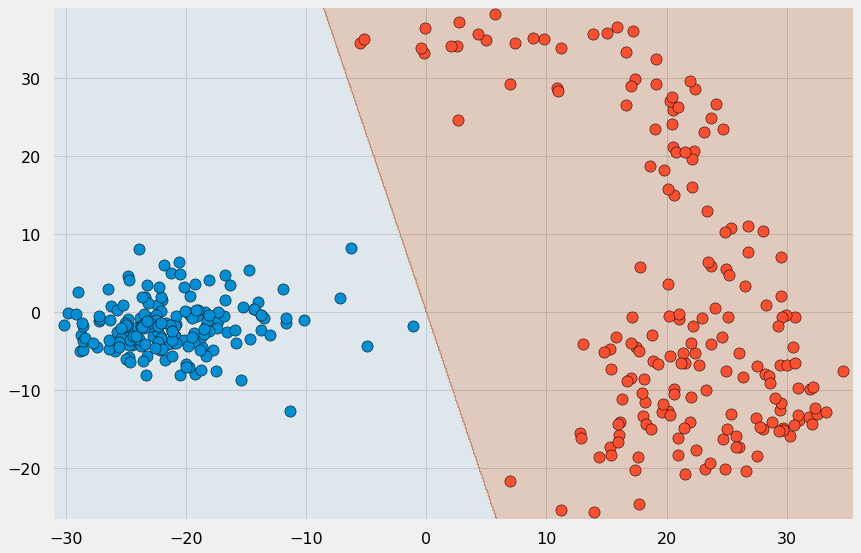

In [10]:
plot_decision_boundary(X, linear_w, least_square_prediction)

Men man bruger ikke least square til at klassifikatoin da vi ikke kan proppe værdier ind i enten 0 og 1. 

Derfor skal vi introducerer en anden algoritme.

### Logistic regression

Vi vender nu blikket om imod en generative metodik, hvor modeller klasse betingelsen denity $p(x|C_k)$ og klasse priors $p(C_k)$ til at beregne en posterior sandsynlighed $p(C_k|x)$ gennem bayes theorem.

Lad os først se på tilfældet med to klasser. Hvor den posterior sansynlighed for klasse $C_1$ kan skrives som

$$
p(C_1|k) = \frac{p(x|C_1) p(C_1)} { p(x|C_1)p(C_1) +p(x|C_2)p(C_2) }
$$

hvor vi har definerede

$$
a=ln \frac{p(x|C_1)p(C_1)}{p(x|C_2)p(C_2)}
$$

og $\sigma(a)$ der vores **sigmoid funktion** kan skrives som

$$
\sigma(a)=\frac{1}{1+exp(-a)}
$$

Måden vi skal tænke på sigmoid funktionen på er den håndtere problementer med outliers. Når vi bruger den tvinger vi vores prediktion til at være mellem intervallet 0 og 1. Det sker fordi den opfylder følgende symmetri betingelse.

$$
\sigma(-a)=1-\sigma(a)
$$

Den inverse af sigmoid er

$$
a=ln(\frac{\sigma(a)}{1-\sigma(a)})
$$

den kendes som **logit** funktionen. Den repræsenter log ratio af sandsynligheden $ln [p(C_1|x) / p(C_2|x) ]$ for de to klasser og kendes som log odds.

Nu kommer vi også hen imod deep learning da en simoid funktion under den terminologi og kaldes for en activation funktion. 

Vi skal optimere vores parameter gennem gradient descent:

$$
\theta_{t+1} = \theta_t-\eta \nabla L (f(x;\theta), y)
$$

Dertil skal vi bruge en **loss funktion** som måler hvor meget vores prediktion er forskellig fra vores y.  I dette tilfælde bruge vi **binary cross entropy**

$$
L_{CE(\hat y, y)} = -\frac{1}{m} \sum^m_{i=1} y log(\hat y) + (1-y) log (1-\hat y)
$$

Når vi ser på + tegnet i ligning får vi at hvis y = 0 så vil venstre side være 0 og hvis y = 1 så vil højre side være 0. Det er måden vi måler hvor meget y hat er forskellige fra y, som kun kan være 0 og 1.

NU skal vi optimere gennem gradienten og det er bare at tage den afledte og sætte lig med 0. 

#### Egen implementering

In [11]:
def _sigmoid(a):
    return np.tanh(a * 0.5) * 0.5 + 0.5

def fit_log_reg(        
        x_train: np.ndarray,
        y_train: np.ndarray,
        max_iter: int = 100,
    ):
        """Maximum likelihood estimation of logistic regression model.
        Parameters
        ----------
        x_train : (N, D) np.ndarray
            training data independent variable
        y_train : (N,) np.ndarray
            training data dependent variable
            binary 0 or 1
        max_iter : int, optional
            maximum number of parameter update iteration (the default is 100)
        """
        w = np.zeros(np.size(x_train, 1))
        for _ in range(max_iter):
            w_prev = np.copy(w)
            y = _sigmoid(x_train @ w)
            grad = x_train.T @ (y - y_train)
            hessian = (x_train.T * y * (1 - y)) @ x_train
            try:
                w -= np.linalg.solve(hessian, grad)
                
            except np.linalg.LinAlgError:
                break
            if np.allclose(w, w_prev):
                break
        return w

In [12]:
weight_log_reg = fit_log_reg(
    X, 
    t_01,
    max_iter= 1000
)

print(weight_log_reg)

[24.8714838   6.32672441]


In [13]:
def logistic_regression_prediction(x_df, weight):
    
    return _sigmoid(x_df @ weight)

logistic_regression_prediction(X, weight_log_reg)

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1.

/var/folders/0k/d7s5j38d55d1v8wt0_thbmr80000gn/T/ipykernel_17818/2060049594.py:22: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, zz, cmap='Paired', alpha=0.25, linewidths=0.7)


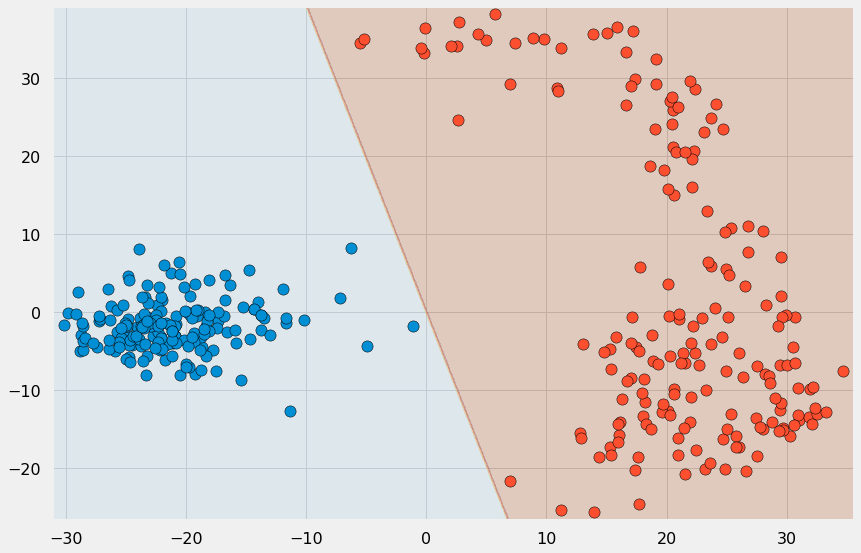

In [14]:
plot_decision_boundary(X, weight_log_reg, logistic_regression_prediction)

#### Sklearn

In [15]:
from sklearn.linear_model import LogisticRegression

loc_sklearn = LogisticRegression()

loc_sklearn.fit(X, t_01)

print("loc.coef_: {}".format(loc_sklearn.coef_))

loc.coef_: [[0.95600279 0.23192786]]


Lad os sammenligne med sklearn.

/var/folders/0k/d7s5j38d55d1v8wt0_thbmr80000gn/T/ipykernel_17818/3270440098.py:19: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, zz, cmap='Paired', alpha=0.25, linewidths=0.7)


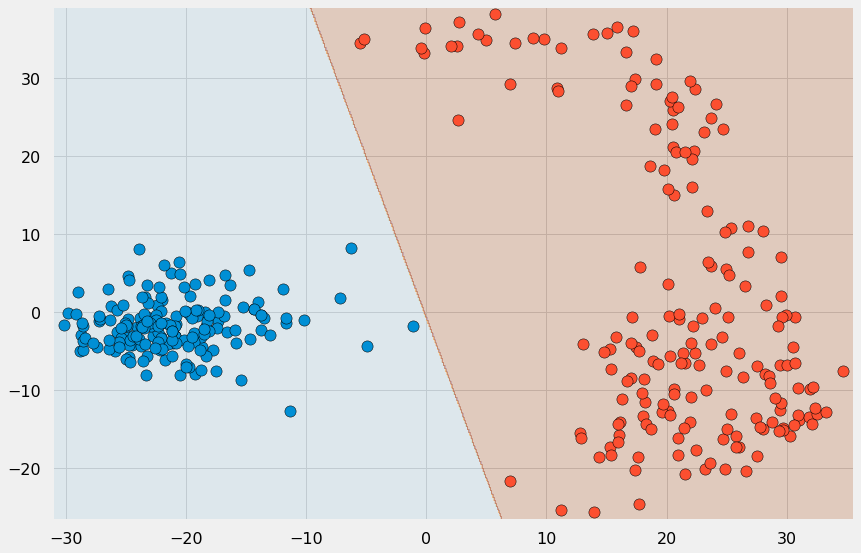

In [16]:
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

yhat = loc_sklearn.predict(grid)

zz = yhat.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Paired', alpha=0.25, linewidths=0.7)

# create scatter plot for samples from each class
for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(t_01 == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired', edgecolors='k')

In [17]:
from sklearn.metrics import accuracy_score

print("Accuracy score for sklearn: {}".format(
    accuracy_score(y_true=t_01, y_pred=loc_sklearn.predict(X))
))

print("Accuracy score for egen funktion: {}".format(
    accuracy_score(y_true=t_01, y_pred=logistic_regression_prediction(X, weight_log_reg) )
))

Accuracy score for sklearn: 1.0
Accuracy score for egen funktion: 1.0


### Multi-class logistic regression

Nu hvor vi har set hvordan bi løser binære klassifikations problemer er den naturlige forlængelse at kigge på den udvidet logiske regrssion hvor vi har flere klasser. 

For multiclass skifter vi sigmoid funktionen ud med en softmax funktion:

$$
softmax(z)=\frac{e^z}{\sum e^z}
$$


Lad os starte med vores data og udvide det til en klasse mere.

/var/folders/0k/d7s5j38d55d1v8wt0_thbmr80000gn/T/ipykernel_17818/2966878552.py:29: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


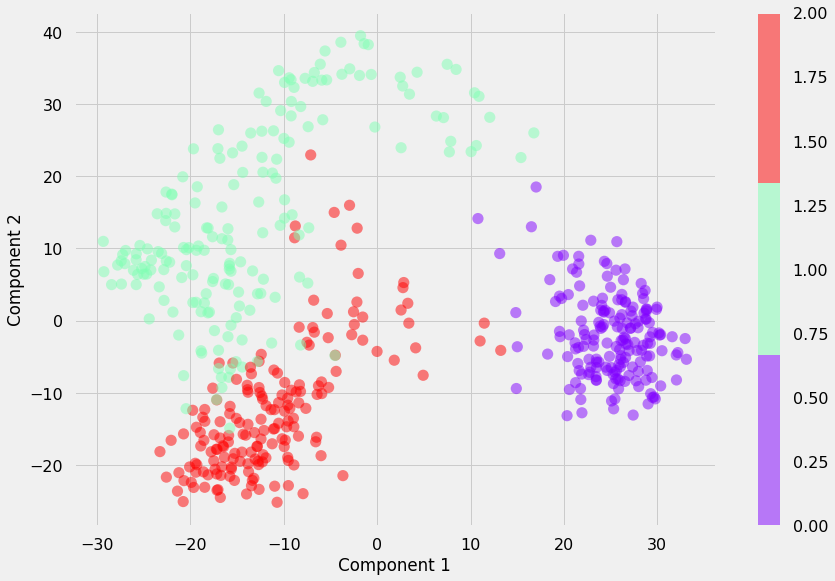

In [18]:
n_class = 3
digits = load_digits(n_class=n_class)
pca = PCA(n_components=2)
X_mult = pca.fit_transform(digits.data)

learning_rate = 0.1

# We need to do a one_hot encoding of our data:
# I.e. 0 -> [1,0,0], 1 -> [0,1,0], 2 -> [0,0,1]
def one_hot(targets, n_class=n_class):
    res = np.eye(n_class)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[n_class])

t_oh = one_hot(digits.target, n_class)


plot_scatter(X_mult, digits.target, n_class=n_class)

Nu med 3 klasser kan vi forsøge at se hvor godt vi kan bygge en ny model.

#### Egen implementering

In [19]:
X = X_mult.copy()
y = digits.target
classes = np.unique(y)
class_label = { c:i for i,c in enumerate(classes)}
weight_new = np.zeros(shape = (len(classes), X.shape[1]))


y_onehot = np.eye(len(classes))[np.vectorize(lambda c: class_label[c])(y).reshape(-1)]

def predict_new(X):
        pre_vals = np.dot(X, weight_new.T).reshape(-1,len(classes))
        return softmax(pre_vals)
    
def softmax(z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

def predict_classes(X):
        probs_ = predict_new(X)
        return np.vectorize(lambda c: classes[c])(np.argmax(probs_, axis=1))
  
def cross_entropy(y, probs):
        return -1 * np.mean(y * np.log(probs))

def evaluate_new(X, y):
        return np.mean(np.argmax(predict_new(X), axis=1) == np.argmax(y, axis=1))

def score(X, y):
        return np.mean(predict_classes(X) == y) 

loss_new = []
i = 0
while (not 100000 or i < 100000):
        loss_new.append(cross_entropy(one_hot(y), predict_new(X)))
        idx = np.random.choice(X.shape[0], 64)
        xbatch, ybatch = X[idx], one_hot(y)[idx]
        error_new = ybatch - predict_new(xbatch)
        update = (0.001 * np.dot(error_new.T, xbatch))
        weight_new += update
        if np.abs(update).max() < 1e-3: 
                break
        if i % 10000 == 0:
                print(' Training Accuray at {} iterations is {}'.format(i, evaluate_new(X, one_hot(y))))
        i += 1


 Training Accuray at 0 iterations is 0.8957169459962756


 Training Accuray at 10000 iterations is 0.9068901303538175


 Training Accuray at 20000 iterations is 0.9162011173184358


 Training Accuray at 30000 iterations is 0.9199255121042831


 Training Accuray at 40000 iterations is 0.9180633147113594


 Training Accuray at 50000 iterations is 0.9199255121042831


 Training Accuray at 60000 iterations is 0.9217877094972067


 Training Accuray at 70000 iterations is 0.9180633147113594


 Training Accuray at 80000 iterations is 0.9162011173184358


 Training Accuray at 90000 iterations is 0.9236499068901304


In [20]:
np.mean(predict_classes(X) == y)

0.9199255121042831

Vi får altså en accuracy på 0.92, som er helt okay, hvor vi også tager med at data klasserne ikke er lineær seperable. 

/var/folders/0k/d7s5j38d55d1v8wt0_thbmr80000gn/T/ipykernel_17818/2513136355.py:12: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap='Paired', alpha=0.25, linewidths=0.7)


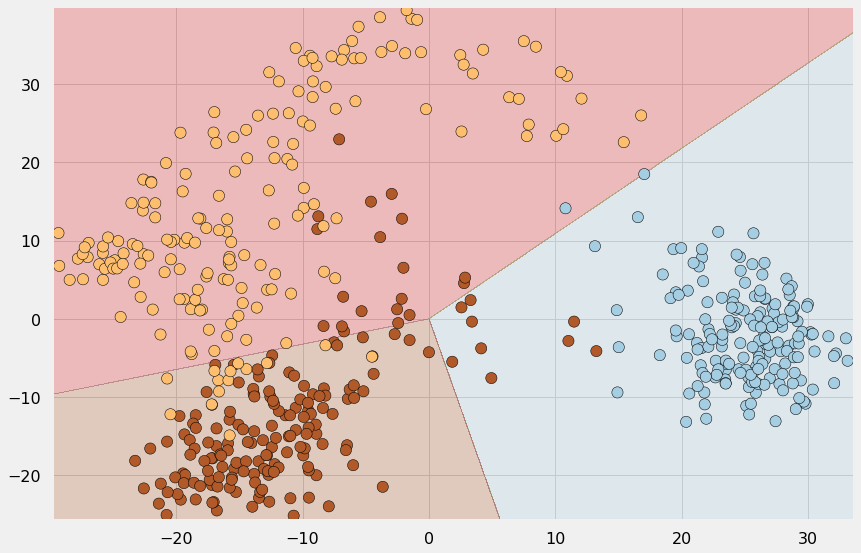

In [21]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = predict_classes(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='Paired', alpha=0.25, linewidths=0.7)

plt.scatter(X[:, 0], X[:, 1], c=digits.target, edgecolors='k', cmap=plt.cm.Paired)

plt.show()

Vi ser foroven meget godt at der er en række punkter vi ikke kan klassificerer korrekt.

Lad os nu gøre det samme med sklearn.

#### Sklearn

/var/folders/0k/d7s5j38d55d1v8wt0_thbmr80000gn/T/ipykernel_17818/1203102074.py:17: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx, yy, Z, cmap='Paired', alpha=0.25, linewidths=0.7)


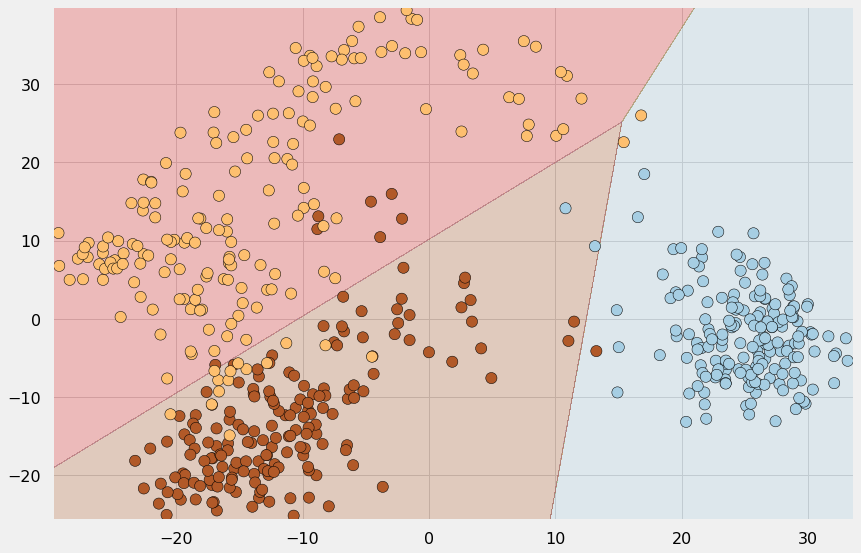

In [22]:
from sklearn.linear_model import LogisticRegression

loc_sklearn_multi = LogisticRegression()

loc_sklearn_multi.fit(X, y)


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = loc_sklearn_multi.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='Paired', alpha=0.25, linewidths=0.7)

plt.scatter(X[:, 0], X[:, 1], c=digits.target, edgecolors='k', cmap=plt.cm.Paired)

plt.show()

Super interssant viser ovenstående at sklearn opnår bedre resultater end mig. Lad os for en god ovens skyld måle accuracy.

In [23]:
from sklearn.metrics import accuracy_score

print("Accuracy score for sklearn: {}".format(
    accuracy_score(y_true=y, y_pred=loc_sklearn_multi.predict(X))
))

print("Accuracy score for egen funktion: {}".format(
    accuracy_score(y_true=y, y_pred=predict_classes(X) )
))

Accuracy score for sklearn: 0.9497206703910615
Accuracy score for egen funktion: 0.9199255121042831


Deres implementering er bedre end min egen.

Der er en række ting som jeg kunne optimerer på, såsom learning rate


## Regression


Regression er den anden del af supervised learning teknikker. Forskellen her er at vores afhængig variable er kontinuerlig, som vil sige at den kan tage uendelig mange numeriske værdier. 

### Lineær regression 

For den meste simple lineær regressions bruges ligningen:

$$
y=\beta_0+\beta_1 x + \epsilon
$$

Vi vil altså forstå y ud fra x, hvor $\epsilon$ er et fejlled, som indeholder ting der forklare y, men som ikke kommer fra x. 



Den simpleste form er **lineær funktioner**, men vi kan opnå bedre resultater ved at bruge andre funktioner som er non lineære og de kaldes for **basis funktioner**. Sådanne modeller er lineære funktioner i dens parameter, men er non lineære med respekt til input variabler.


To ofte brugte basisas funktioner er *Polynomial*, *Gaussian* og *Sigmoid*:

$$
\phi_j(x) = \sigma \left( \frac{x-\mu_j}{s} \right) 
\\
\sigma(a) = \frac{1}{1+exp(-a)}
$$

Grunnden til man vil vælge en anden basis funktion skyldes forholdet mellem x og y, men oftes vælger man at benytte sig af den lineære og så inkluderer features af de diverse skæringer. 

Lad of lavet et data, som vil være det vi bygger vores modeller udfra:

In [24]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

#### Egen implementering

In [25]:
class LinearRegression_own():
    """Linear regression model.
    y = X @ w
    t ~ N(t|X @ w, var)
    """

    def fit(self, x_train: np.ndarray, y_train: np.ndarray):
        """Perform least squares fitting.
        Parameters
        ----------
        x_train : np.ndarray
            training independent variable (N, D)
        y_train : np.ndarray
            training dependent variable (N,)
        """
        self.w = np.linalg.pinv(x_train) @ y_train
        self.var = np.mean(np.square(x_train @ self.w - y_train))

    def predict(self, x: np.ndarray, return_std: bool = False):
        """Return prediction given input.
        Parameters
        ----------
        x : np.ndarray
            samples to predict their output (N, D)
        return_std : bool, optional
            returns standard deviation of each predition if True
        Returns
        -------
        y : np.ndarray
            prediction of each sample (N,)
        y_std : np.ndarray
            standard deviation of each predition (N,)
        """
        y = x @ self.w
        if return_std:
            y_std = np.sqrt(self.var) + np.zeros_like(y)
            return y, y_std
        return y

In [26]:
import itertools
import functools
import numpy as np


class PolynomialFeature(object):
    """
    polynomial features
    transforms input array with polynomial features
    Example
    =======
    x =
    [[a, b],
    [c, d]]
    y = PolynomialFeatures(degree=2).transform(x)
    y =
    [[1, a, b, a^2, a * b, b^2],
    [1, c, d, c^2, c * d, d^2]]
    """

    def __init__(self, degree=2):
        """
        construct polynomial features
        Parameters
        ----------
        degree : int
            degree of polynomial
        """
        assert isinstance(degree, int)
        self.degree = degree

    def transform(self, x):
        """
        transforms input array with polynomial features
        Parameters
        ----------
        x : (sample_size, n) ndarray
            input array
        Returns
        -------
        output : (sample_size, 1 + nC1 + ... + nCd) ndarray
            polynomial features
        """
        if x.ndim == 1:
            x = x[:, None]
        x_t = x.transpose()
        features = [np.ones(len(x))]
        for degree in range(1, self.degree + 1):
            for items in itertools.combinations_with_replacement(x_t, degree):
                features.append(functools.reduce(lambda x, y: x * y, items))
        return np.asarray(features).transpose()
    
    

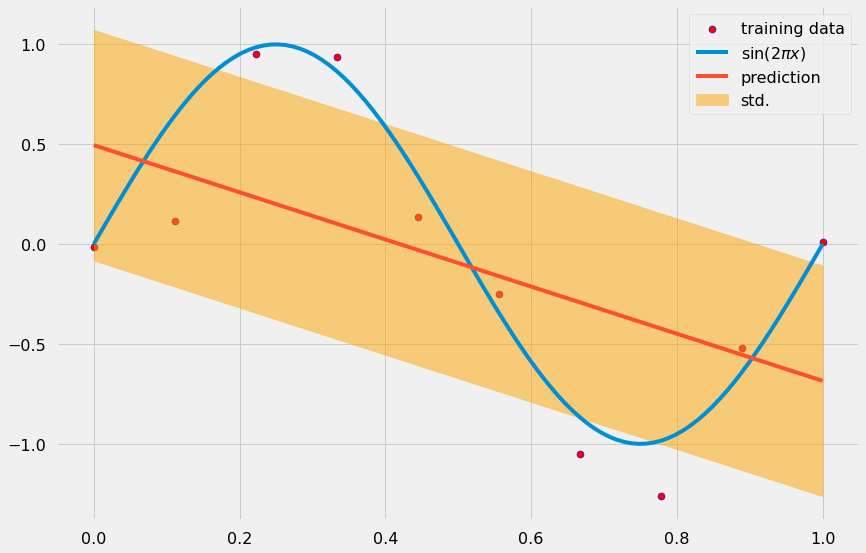

In [27]:
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

# Pick one of the three features below
feature = PolynomialFeature(1)
#feature = GaussianFeature(np.linspace(0, 1, 8), 0.1)
# feature = SigmoidalFeature(np.linspace(0, 1, 8), 10)

X_train = feature.transform(x_train)
X_test = feature.transform(x_test)
model = LinearRegression_own()
model.fit(X_train, y_train)
y, y_std = model.predict(X_test, return_std=True)

plt.scatter(x_train, y_train, facecolor="red", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y, label="prediction")
plt.fill_between(x_test, y - y_std, y + y_std, color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

I ovenstående graf ser vi vores sinus lignign, trænings data, prediktion og standardafvigelsen. Modellen fanger trend, men ved ikke at den sker i bølger, så den opnår ikke det bedste result og får nogle bredde konfidnes bånd.  

#### Sklearn

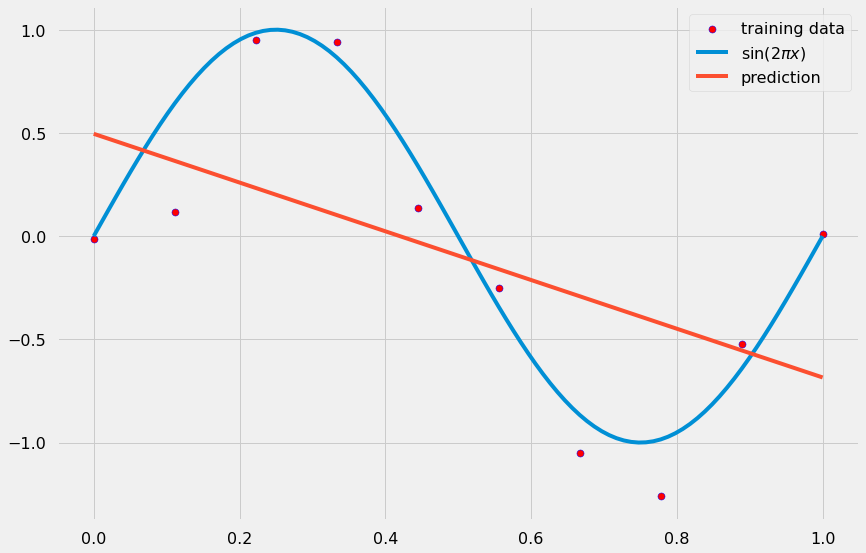

In [28]:
from sklearn.linear_model import LinearRegression

lin_sklearn = LinearRegression()

model = LinearRegression()
model.fit(X_train, y_train)
y_sklearn = model.predict(X_test)

plt.scatter(x_train, y_train, facecolor="red", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y, label="prediction")
#plt.fill_between(x_test, y - y_std, y + y_std, color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y)

print("Root mean square error for sklearn: {}".format(
    mean_squared_error(y_test, y)
))

print("Root mean square error for egen funktion: {}".format(
    mean_squared_error(y_test, y_sklearn)
))

Root mean square error for sklearn: 0.25055186287174
Root mean square error for egen funktion: 0.2505518628717401


Lad os se hvordan vi fitter vores data med udskift i basis funktionen.



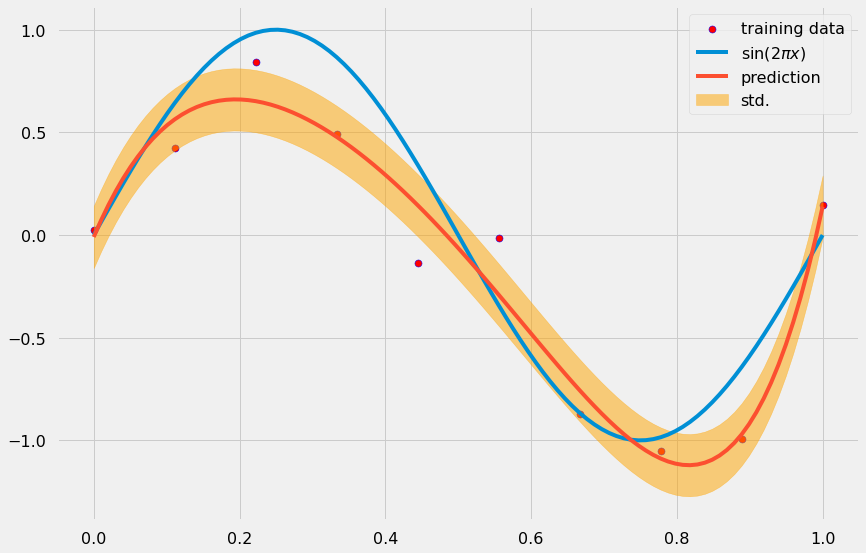

In [30]:
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

# Pick one of the three features below
feature = PolynomialFeature(5)
#feature = GaussianFeature(np.linspace(0, 1, 8), 0.1)
# feature = SigmoidalFeature(np.linspace(0, 1, 8), 10)

X_train = feature.transform(x_train)
X_test = feature.transform(x_test)
model = LinearRegression_own()
model.fit(X_train, y_train)
y, y_std = model.predict(X_test, return_std=True)

plt.scatter(x_train, y_train, facecolor="red", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y, label="prediction")
plt.fill_between(x_test, y - y_std, y + y_std, color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

Ved dette skift få vi næsten en hel perfekt model, hvor båndet også er blevet meget mindre. 

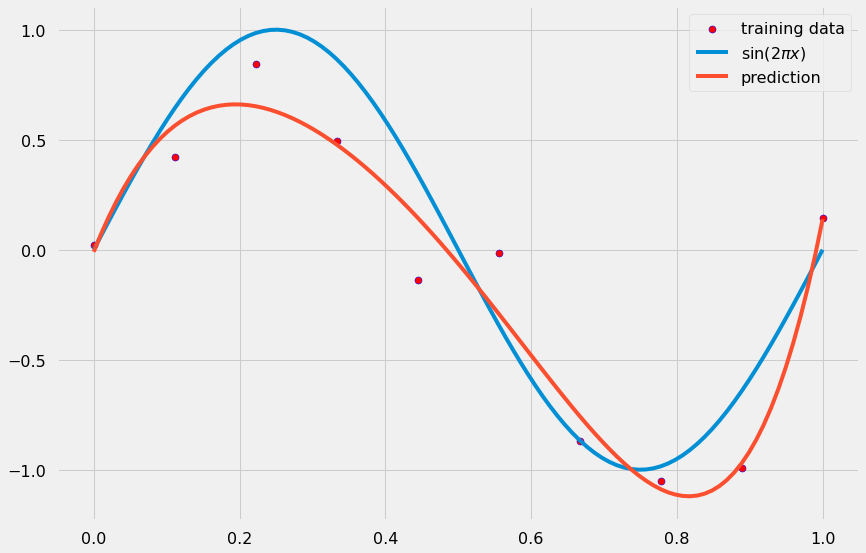

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

model_pip = Pipeline(
    [
        ('poly', PolynomialFeatures(degree=5)),
        ('linear', LinearRegression() )
    ]
)

model_pip.fit(X_train, y_train)
y_sklearn = model.predict(X_test)

plt.scatter(x_train, y_train, facecolor="red", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y, label="prediction")
#plt.fill_between(x_test, y - y_std, y + y_std, color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y)

print("Root mean square error for sklearn: {}".format(
    mean_squared_error(y_test, y)
))

print("Root mean square error for egen funktion: {}".format(
    mean_squared_error(y_test, y_sklearn)
))

Root mean square error for sklearn: 0.048462463039811415
Root mean square error for egen funktion: 0.048462463039811415


VI opnår altså rigtig gode resultater ved at lave polynomial fitting med ordre 5.

Dog kommer vi ind i et problem kaldet overfitting, som er et emne jeg behandler i sektionen....

En område indenfor ML der fylder meget er Bayesian statisric. Defor helligere jeg et afsnit til en baysiansk måde at håndterer overfitting.

### Bayesian Linear Regression

Med bayesiansk statisk kan vi bedre tage hånd om usikkerhed. Her benytter man sig af Bayes theorem:

![](bayes.png)

* likelihood funktion:
* Prior:
* Conjugate Prior:
* Posterior distribution:

For at gøre tingene letter så introducere vi en prior sandsynlighed over model parameteren, w. Vores likelihood funktion $p((t|X,w,\beta) = \prod^N_{n=1}N(t_n|w^T\phi(x_n),\beta^{-1})$ er eksponent af en kvadratisk funktion af w. Den tilsvarende conjugate prior er givet af den Gaussian fordeling

$$
p(w)=N(w|m_0,S_0)
$$
som har mean $m_0$, og kovarians, $S_0$.

Næst skal vi have posterior fordelingen som er proportional med likelihood og prior. Da vores conjugate er en Gaussian vil posterior også være Gaussian. Den generelle for er

$$
p(w|t)=N(w|m_N,S_N)
$$

med

$$
m_N=S_N(S^{-1}_0m_0+\beta \Phi^Tt) \\
S_N^{-1}=S_0^{-1}+\beta \Phi^T\Phi
$$

